In [1]:
run src/preprocessing.py

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
dataset_1.shape, dataset_2.shape, dataset_3.shape, dataset_4.shape

((1444, 382), (1444, 390), (1444, 382), (1444, 390))

#### Complete Feature Sets

We are starting to do some fairly complicated feature engineering. It makes sense that we should spend some time thinking about the different data sets we are creating so that we can keep track of what we have.

##### Dataset 1 - Standard Scaled Data Set

One data set is the standard scaled data set. For this data set, there is no need to separate the encoded categorical features. These two dataframes comprise a complete data set

- Log Transformed, Standard Scaled Numerical Features (`numeric_log_std_sc_out_rem_df`)
- Complete One-hot Encoded Categorical Features (`categorical_encoded_df`)

##### Dataset 2 - Standard Scaled, PCA Augmented Data Set

One data set is the standard scaled data set, augmented with transformed data from a PCA Run on the numeric features. We know that there is significant redundancy in this data set. These three dataframes comprise a complete data set

- Log Transformed, Standard Scaled Numerical Features (`numeric_log_std_sc_out_rem_df`)
- Complete One-hot Encoded Categorical Features (`categorical_encoded_df`)
- PCA-transformed Numeric Data (`numeric_log_std_sc_out_rem_pca_df`)

##### Dataset 3 - Gelman Scaled Data Set

Another data set is the Gelman scaled data set. For this data set, we have separated the encoded categorical features based on a threshold for variance. These three dataframes comprise a complete data set

- Log Transformed, Gelman Scaled Numerical Features (`numeric_log_gel_sc_df`)
- One-hot Encoded Categorical Features with Significant Variance, Centered (`categorical_encoded_features_significant_variance_centered`)
- One-hot Encoded Categorical Features with Insignificant Variance (`categorical_encoded_features_insignificant_variance`)

##### Dataset 4 - Gelman Scaled, PCA Augmented  Data Set

Our final data set is the Gelman scaled data set, augmented with transformed data from a PCA Run on the numeric features and categorical features with significant variance. This Data sets also has significant redundancy. For this data set, we have separated the encoded categorical features based on a threshold for variance. These three dataframes comprise a complete data set

- Log Transformed, Gelman Scaled Numerical Features (`numeric_log_gel_sc_df`)
- One-hot Encoded Categorical Features with Significant Variance, Centered (`categorical_encoded_features_significant_variance_centered`)
- One-hot Encoded Categorical Features with Insignificant Variance (`categorical_encoded_features_insignificant_variance`)
- PCA-transformed Numeric and Significant Categorical (`numeric_gelman_categorical_significant_pca`)





In [5]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [6]:
mean_sale_price = target_1.mean()
naive_guess = np.ones(len(target_1))*mean_sale_price

In [7]:
naive_guess[:5]

array([180922.1066482, 180922.1066482, 180922.1066482, 180922.1066482,
       180922.1066482])

In [8]:
naive_r2 = r2_score(target_1, naive_guess)
naive_rmse = np.sqrt(mean_squared_error(target_1, naive_guess))
naive_mae = mean_absolute_error(target_1, naive_guess)

In [9]:
naive_r2, naive_rmse, naive_mae

(0.0, 79216.76694980003, 57374.611279072444)

#### Fundamental Question: How much does a home in Ames, Iowa sell for?

In [14]:
!pip install tqdm --quiet

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [11]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from tqdm import tqdm 
from time import time

In [12]:
import sklearn

In [13]:
sklearn.__version__

'0.19.1'

In [34]:
def sample_training_set(X_train, y_train, n_pcnt):
    n = X_train.shape[0]*n_pcnt//100
    return n, X_train[:n], y_train[:n]

def time_function_call(function_call):
    start = time()
    result = function_call
    execution_time = time() - start
    return result, execution_time

def run_model(model, model_name, n_pcnt, data, labels):

    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=.1,
                                                        random_state=1000)

    
    n, X_samp, y_samp = sample_training_set(X_train, y_train, n_pcnt)
    
    _, fit_time = time_function_call(
        model.fit(X_samp, y_samp))
    
    train_pred, train_pred_time = time_function_call(
        model.predict(X_samp))
    
    test_pred, test_pred_time = time_function_call(
        model.predict(X_test))    
    
    return {
            'model_name' : model_name,
            'n_pcnt' : n_pcnt,
            'n' : n, 
            'rmse_train' : np.sqrt(mean_squared_error(y_samp, train_pred)),
            'rmse_test' : np.sqrt(mean_squared_error(y_test, test_pred)),
            'mae_train' : mean_absolute_error(y_samp, train_pred),
            'mae_test' : mean_absolute_error(y_test, test_pred),
            'r2_train_score' : model.score(X_samp, y_samp),
            'r2_test_score' : model.score(X_test, y_test),
            'fit_time' : fit_time,
            'train_pred_time' : train_pred_time,
            'test_pred_time' : test_pred_time}

In [35]:
dataset_2.shape, target_2.shape

((1444, 390), (1444,))

In [36]:
test_results = {}
percentages = [1,2,3,4,5,7,10,15,20,25,30,40,50,60,70,80,90,100]
for n in tqdm(percentages):
    test_results[n] = run_model(Lasso(max_iter=1E5), 'Lasso', n,
                                dataset_2,
                                target_2)


100%|██████████| 18/18 [01:01<00:00,  3.42s/it]


In [37]:
test_results = pd.DataFrame(test_results).T.sort_values('n')
test_results

,fit_time,mae_test,mae_train,model_name,n,n_pcnt,r2_test_score,r2_train_score,rmse_test,rmse_train,test_pred_time,train_pred_time
1,9.53674e-07,34937.4,2.56006,Lasso,12,1,0.374484,1,60367.8,3.45762,1.19209e-06,0
2,0,29926,6.31328,Lasso,25,2,0.607213,1,47837.1,8.31628,0,0
3,0,28855.8,11.1716,Lasso,38,3,0.645409,1,45451.7,14.8581,0,9.53674e-07
4,0,29888.1,21.1151,Lasso,51,4,0.65257,1,44990.4,26.4874,0,0
5,0,29972.1,22.9609,Lasso,64,5,0.63696,1,45990,29.5583,0,0
7,1.19209e-06,31582.5,53.507,Lasso,90,7,0.675717,0.999999,43465.9,66.983,0,0
10,1.19209e-06,42466.8,105.345,Lasso,129,10,0.4439,0.999998,56919.7,129.28,0,0
15,1.19209e-06,48867,404.172,Lasso,194,15,0.313538,0.999966,63240.4,547.589,0,9.53674e-07
20,1.19209e-06,44219.9,3711.01,Lasso,259,20,0.399898,0.996536,59128.8,5489.86,9.53674e-07,0
25,0,41717.9,6591.71,Lasso,324,25,0.476511,0.989529,55225.5,9103.53,0,1.19209e-06


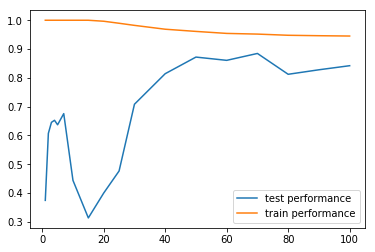

In [38]:
plt.plot(test_results.n_pcnt, test_results.r2_test_score, label='test performance')
plt.plot(test_results.n_pcnt, test_results.r2_train_score, label='train performance')
plt.legend()